D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1041: UserWarning: Duplicate key in file "D:\Program Files\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc", line #44
  (fname, cnt))


             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

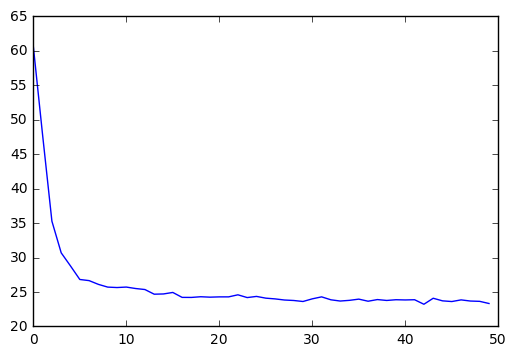

155
预测值： 20.583469
标签值：23.100000


In [1]:
#个人姓名 学号 班级
#波士顿房价预测
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#读取数据文件
#header ：指定行数用来作为列名，数据开始行数。
#         如果文件中没有列名，则默认为0【第一行数据】，否则设置为None。
df = pd.read_csv("data/boston.csv", header = 0)
#显示数据摘要描述信息
print(df.describe())

#获取df的值
df = df.values
#把df转换为np的数组格式
df = np.array(df)

#数据归一化
for i in range(12):
    df[:, i] = ((df[:, i] - df[:, i].min()) / (df[:, i].max() - df[:, i].min()))

#x_data 为前12列特征数据
#y_data 为最后1列特征数据
x_data = df[:, :12]
y_data = df[:, 12]


#模型定义
#定义特征数据和标签数据的占位符
x = tf.placeholder(tf.float32, [None, 12], name = "X")#12个特征数据(12列)
y = tf.placeholder(tf.float32, [None, 1], name = "Y") #1个标签数据(1列)

#定义模型函数
#定义了一个命名空间
with tf.name_scope("Model"):
    # w初始值为shape=（12，1）的随机数，标准差为0.01
    w = tf.Variable(tf.random_normal([12, 1], stddev = 0.01), name = "W")
    #b初始化值为1.0
    b = tf.Variable(1.0, name = "b")

    #矩阵叉乘用matmul, 点乘用multiply或*
    def model(x, w, b):
        return tf.matmul(x, w) + b

    #预测计算操作，前向计算节点
    pred = model(x, w, b)

#模型训练
#迭代轮次和学习率
train_epochs = 50
learning_rate = 0.01
#定义损失函数 均方差
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y - pred, 2))
#创建优化器
optimzer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
#声明会话及初始化
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_list = []#用于保存loss值的列表
#迭代训练
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)

        _, loss = sess.run([optimzer, loss_function], feed_dict={x: xs, y: ys})
        loss_sum = loss_sum + loss

    #打乱数据顺序
    x_data, y_data = shuffle(x_data, y_data)

    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    loss_average = loss_sum / len(y_data)

    loss_list.append(loss_average)

    print("epoch=", epoch + 1, "loss=", loss_average, "b=", b0temp, "w=", w0temp)

plt.plot(loss_list)
plt.show()
#随机指定一条来看看效果
n = np.random.randint(506)
print(n)
x_test = x_data[n]
x_test = x_test.reshape(1, 12)
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值： %f" % predict)

target = y_data[n]
print("标签值：%f" % target)
